In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch import nn,optim,Tensor
import torch
root=r"D:\Business\LSTM_NN\data\raw_data.csv"
data = pd.read_csv(root)
X=np.array(data['rb'])
y=np.array(data['hc'])
len(X)

789

In [21]:
#数据集划分
X_train, X_val=X[:600],X[600:]
y_train, y_val = y[:600],y[600:]
mean,sigma=y_train.mean(),y_train.std()
X_train=X_train.reshape(-1,1)
X_val=X_val.reshape(-1,1)
y_train=y_train.reshape(-1,1)
y_val=y_val.reshape(-1,1)

scaler_x = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train)

X_train = scaler_x.transform(X_train)
X_val = scaler_x.transform(X_val)
y_train = scaler_y.transform(y_train)
y_val = scaler_y.transform(y_val)

X_train=torch.from_numpy(X_train).float()
X_val=torch.from_numpy(X_val).float()
y_train=torch.from_numpy(y_train).float()
y_val=torch.from_numpy(y_val).float()

In [3]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1))
#1 hidden layer, with 13 hidden neurons
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [4]:
def training_loop(n_epochs, optimiser, model, loss_fn, X_train,  X_val, y_train, y_val):
    for epoch in range(1, n_epochs + 1):
        output_train = model(X_train) # forwards pass
        loss_train = loss_fn(output_train, y_train) # calculate loss
        output_val = model(X_val) 
        loss_val = loss_fn(output_val, y_val)
        
        optimiser.zero_grad() # set gradients to zero
        loss_train.backward() # backwards pass
        optimiser.step() # update model parameters
        if epoch == 1 or epoch % 100 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [5]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1))
optimiser = optim.SGD(seq_model.parameters(), lr=1e-3)
training_loop(
    n_epochs = 5000, 
    optimiser = optimiser,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    X_train = X_train,
    X_val = X_val, 
    y_train = y_train,
    y_val = y_val)

Epoch 1, Training loss 1.0831, Validation loss 4.7044
Epoch 100, Training loss 0.6669, Validation loss 2.8679
Epoch 200, Training loss 0.4335, Validation loss 1.7977
Epoch 300, Training loss 0.3039, Validation loss 1.1695
Epoch 400, Training loss 0.2321, Validation loss 0.7962
Epoch 500, Training loss 0.1924, Validation loss 0.5717
Epoch 600, Training loss 0.1703, Validation loss 0.4346
Epoch 700, Training loss 0.1576, Validation loss 0.3491
Epoch 800, Training loss 0.1500, Validation loss 0.2944
Epoch 900, Training loss 0.1449, Validation loss 0.2583
Epoch 1000, Training loss 0.1413, Validation loss 0.2337
Epoch 1100, Training loss 0.1385, Validation loss 0.2163
Epoch 1200, Training loss 0.1361, Validation loss 0.2035
Epoch 1300, Training loss 0.1340, Validation loss 0.1938
Epoch 1400, Training loss 0.1320, Validation loss 0.1861
Epoch 1500, Training loss 0.1302, Validation loss 0.1799
Epoch 1600, Training loss 0.1284, Validation loss 0.1747
Epoch 1700, Training loss 0.1267, Validatio

In [45]:
time=np.linspace(1,789,789)
time1=np.linspace(1,600,600)
time2=np.linspace(601,789,189)
output_train=seq_model(X_train)
output_plot1=output_train.detach().numpy()
output_plot1=output_plot1.reshape(-1)
output_plot1=output_plot1*sigma+mean
output_val=seq_model(X_val)
output_plot2=output_val.detach().numpy()
output_plot2=output_plot2.reshape(-1)
output_plot2=output_plot2*sigma+mean
y_plot1=y_train.detach().numpy()
y_plot1=y_plot1.reshape(-1)
y_plot1=y_plot1*sigma+mean

In [46]:
np.size(output_plot2)

189

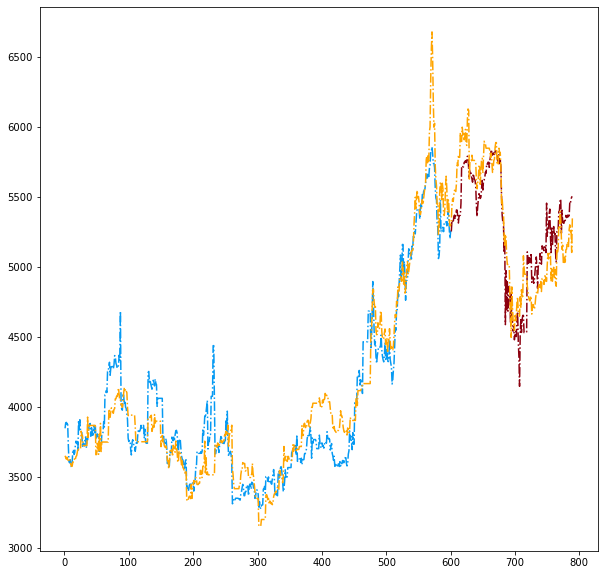

In [51]:
plt.rcParams['figure.figsize'] = [10,10]
plt.plot(time1,output_plot1,'-.',color='#069AF3')
plt.plot(time2,output_plot2,'-.',color='#8C000F')
plt.plot(time,y,'-.',color='orange')